In [ ]:
'''
Modelo determinístico
Baseado em regras (if - then)
Rápidase efetivas, porém pode chegar rápido a um overfitting
Root -> Node -> leaf

MOTIVAÇÃO
•Árvore de classificação
•Árvore de regressão
•separação da Base em treinamento e teste
•Matriz de confusão
•Métricas de avaliação: MAE e RMSE
'''

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
os.chdir("C:\\Users\\dalto\\OpM na Prática\\Python\\Base de Dados")

df1 = pd.read_csv("bill_authentication.csv")
#Base de dados da UCI que traz uma tarefa de classificação
#Utiliza 4 variáveis para definir se uma cédula é falsa ou verdadeira

In [6]:
df1.shape

(1372, 5)

In [7]:
df1.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [9]:
df1.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [10]:
x1 = df1.drop('Class', axis = 1) # Corta a coluna especificada e mantém o resto
y1 = df1['Class']

In [15]:
#Separando os dados entre treinamento e teste

from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.30)

In [20]:
#Treinamento da árvore de decisão para a tareffa de classificação - reveja a aula de tarefas de data mining se preciso

from sklearn.tree import DecisionTreeClassifier

mod_arvore1 = DecisionTreeClassifier()

mod_arvore1.fit(x_train1, y_train1) # Essa é a linha que treina o modelo
DecisionTreeClassifier()

DecisionTreeClassifier()

In [21]:
#Predições para o teste

y_pred_test1 = mod_arvore1.predict(x_test1)

In [22]:
#Como avaliar os resultados

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test1, y_pred_test1))
print()
print("------------------------------------------------")
print()
print(classification_report(y_test1,y_pred_test1))

[[227   5]
 [  8 172]]

------------------------------------------------

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       232
           1       0.97      0.96      0.96       180

    accuracy                           0.97       412
   macro avg       0.97      0.97      0.97       412
weighted avg       0.97      0.97      0.97       412



In [26]:
import sklearn.metrics as metrics
print("Acurácia: ", round(metrics.accuracy_score(y_test1, y_pred_test1),4))

Acurácia:  0.9684


In [27]:
# Para visualizar a árvore de decisão siga estes passos, nesta ordem:

# 1 - Download deste arquivo - https://graphviz.gitlab.io/_pages/Download/windows/graphviz-2.38.msi
# 2 - Instalaçao das bibliotecas graphviz e pydotplus
# 3 - Rode o codigo a seguir toda vez que quiser plotar:

os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

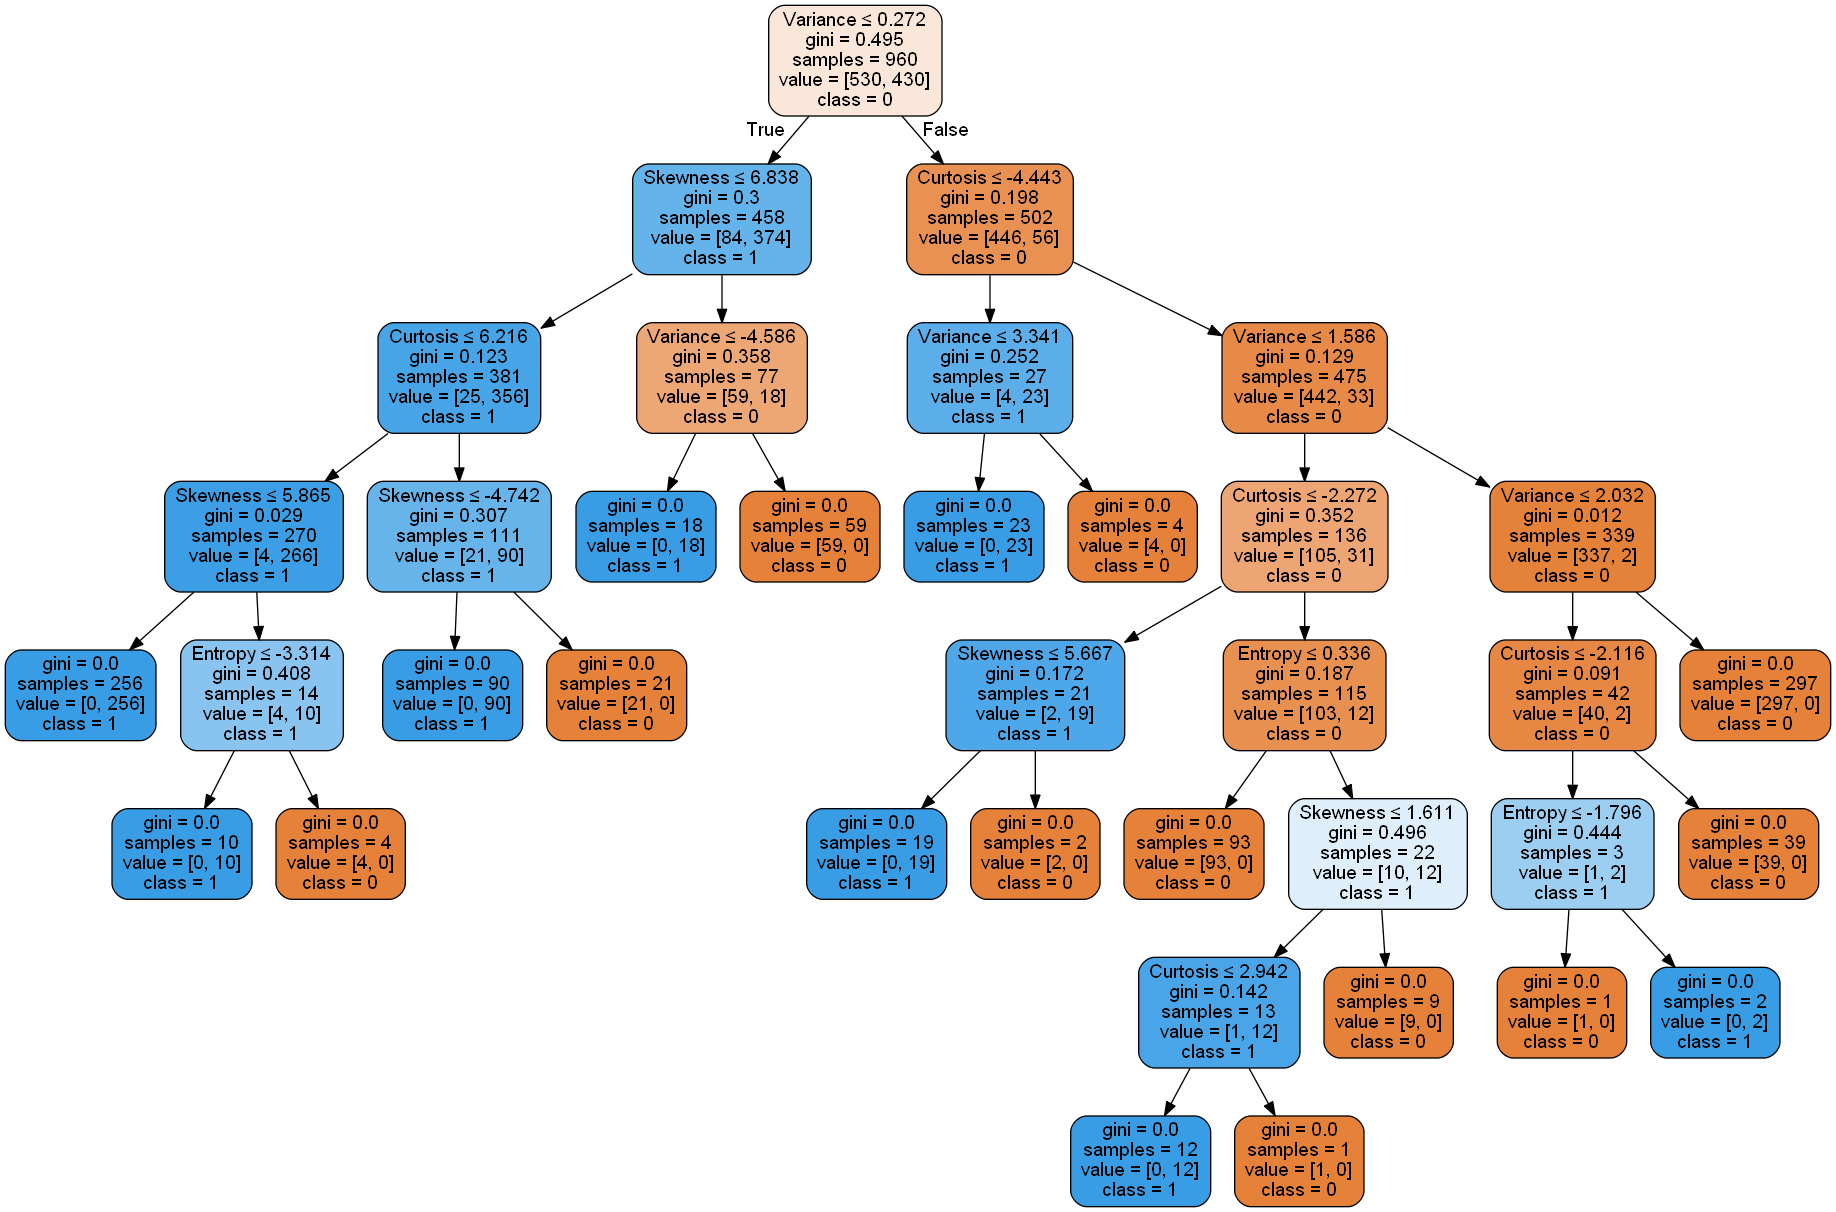

In [36]:
from six import StringIO #from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(mod_arvore1
                , out_file = dot_data
                , filled = True
                , rounded = True
                , special_characters = True
                , feature_names = df1.columns[0:4]
                , class_names = ['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [40]:
#ÁRVORE DE DECISÃO PARA TAREFA DE REGRESSÃO

#Carregando base de dados e fazendo os testes iniciais

df2 = pd.read_csv("petrol_consumption.csv")

In [41]:
df2.shape

(48, 5)

In [42]:
df2.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [43]:
df2.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [47]:
x2 = df2.drop('Petrol_Consumption', axis=1)
y2 = df2['Petrol_Consumption']

In [48]:
from sklearn.model_selection import train_test_split

xTrain2, xTest2, yTrain2, yTest2 = train_test_split(x2, y2, test_size = 0.30, random_state=0)

In [49]:
#Treinamento da árvore de decisão para a tarefa de regressão - reveja a aula tarefas de data mining se preciso
#Repare que muda o import feito do sklearn

from sklearn.tree import DecisionTreeRegressor

modTree2 = DecisionTreeRegressor()

modTree2.fit(xTrain2, yTrain2)

DecisionTreeRegressor()

In [50]:
#predições
predTest2 = modTree2.predict(xTest2)

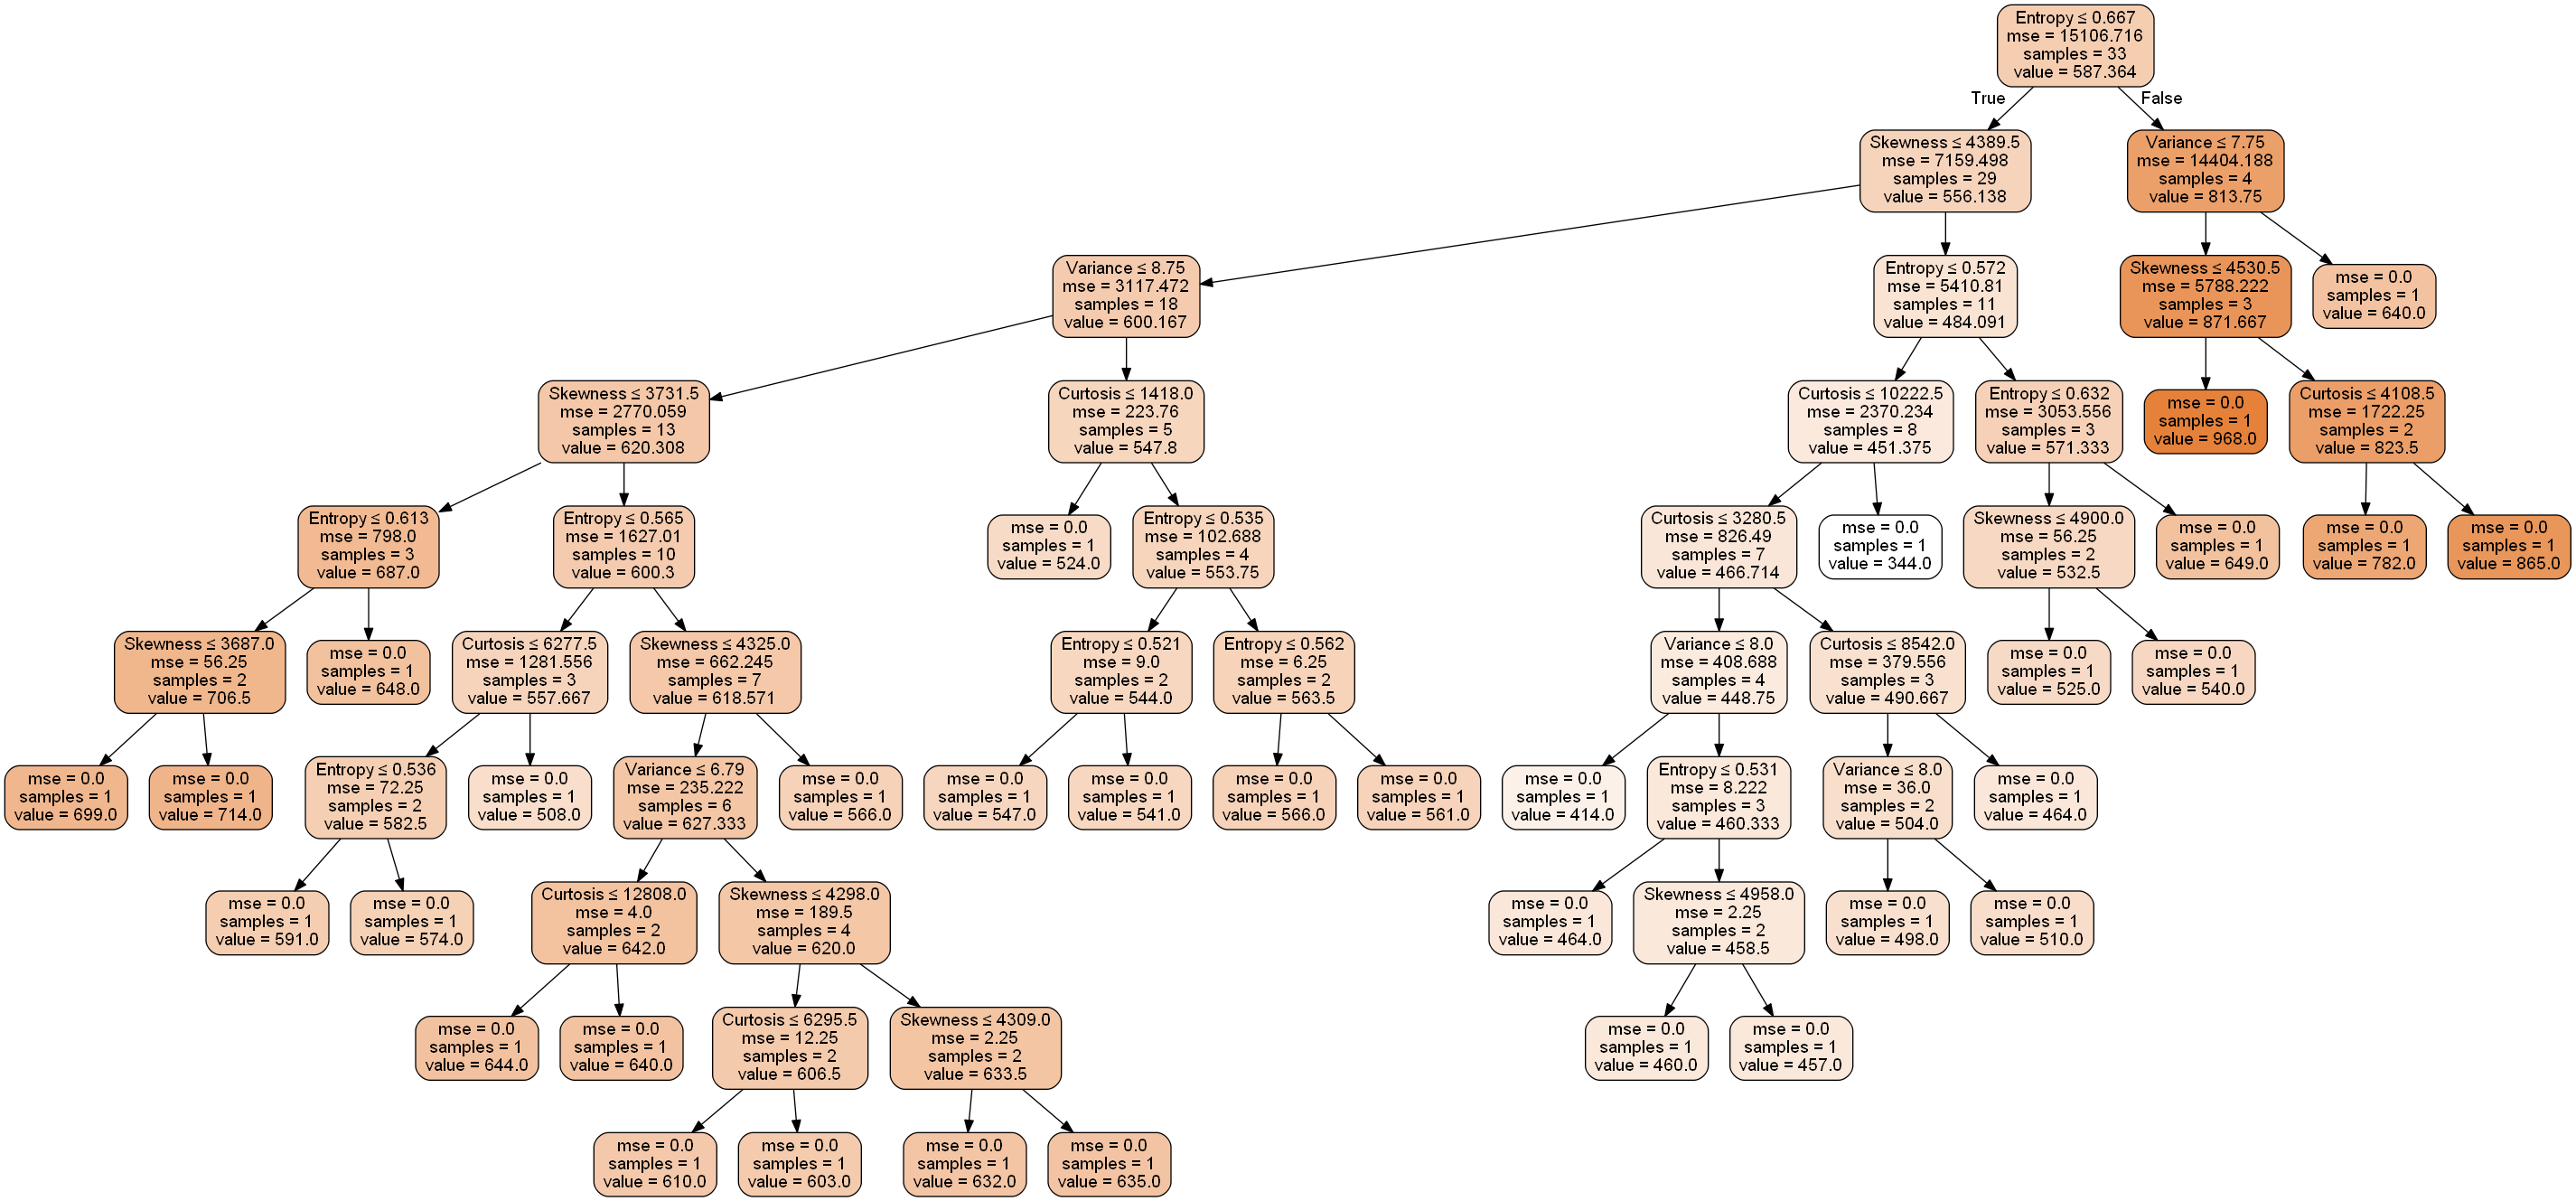

In [51]:
from six import StringIO #from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(modTree2
                , out_file = dot_data
                , filled = True
                , rounded = True
                , special_characters = True
                , feature_names = df1.columns[0:4]
                , class_names = ['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [54]:
df2Aval = pd.DataFrame ({'Real' : yTest2, 'Previsto' : predTest2})
df2Aval

,Real,Previsto
29,534,547.0
4,410,414.0
26,577,699.0
30,571,699.0
32,577,699.0
37,704,603.0
34,487,699.0
40,587,525.0
7,467,414.0
10,580,498.0


In [63]:
#Há duas métricas bem aceitas no mercado para avalair resultados contínuos
# Erro médio absoluto - MAE (Mean Absolute Error)
# Erro médio quadrado - RMSE (Root Mean Square Error) - sendo essa a métrica amis comum de avaliação

from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(yTest2, predTest2))
print('Root Mean Square Error: ', np.sqrt(metrics.mean_squared_error(yTest2, predTest2)))

Mean Absolute Error:  85.73333333333333
Root Mean Square Error:  102.66255403018181


In [68]:
#Como avaliar estas métricas?
#Fazendo uma comparação entre treinamento e teste - não é o caso na árvore regressora
# porque o MAE no treinamento será sempre zero

print('MAE - Treino: ', metrics.mean_absolute_error(yTrain2, modTree2.predict(xTrain2)))
print('MAE - Teste', metrics.mean_absolute_error(yTest2, predTest2))

MAE - Treino:  0.0
MAE - Teste 85.73333333333333


In [71]:
#Olhando apenas a base de teste

print("A média do consumo de combustível da base é:")
print(yTest2.mean())
print()
print("O percentual do MAE em relação a média da base: ")
print(round(metrics.mean_absolute_error(yTest2, predTest2)/yTest2.mean()*100,2))
#número razoável de erro são aqueles abaixo de 10%

A média do consumo de combustível da base é:
553.4666666666667

O percentual do MAE em relação a média da base: 
15.49


In [73]:
#A acurácia do modelo não vai fazer sentido porque não é uma variável binária (classificação)

print("Acurácia: ", metrics.accuracy_score(yTest2, predTest2))

Acurácia:  0.0
